In [1]:
#setup dependencies
import pandas as pd
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import gmaps
import requests
import json
from config import gkey

In [2]:
#import csvs
UGB_Popcsv = "UGB_pop.csv"
UGB_Growcsv = "UGB_PopGrowth.csv"
top100_Popcsv = "Top100_CitiesPop.csv"
top100_Growcsv = "Pop_Growth.csv"

In [3]:
#set up dataframes and check output
#UGB pop and growth
#top 100 pop and growth
UGBpop_df = pd.read_csv(UGB_Popcsv)
UGBgro_df = pd.read_csv(UGB_Growcsv)
Toppop_df = pd.read_csv(top100_Popcsv)
Topgro_df = pd.read_csv(top100_Growcsv)

In [4]:
#merge the top100 Pop and growth, output
top100_df = pd.merge(Toppop_df, Topgro_df, how = "left", on = ["ID", "ID"])
#top100_df.head()

In [5]:
#merge UGB pop and growth, output
UGB_df = pd.merge(UGBpop_df, UGBgro_df, how = "left", on = ["ID", "ID"])
#UGB_df

In [6]:
#reformat the df's, (remove Rank_x, Rank_y, City_y, State_y,
#Estimated Population 2017, Estimated Population 2018)
UGB_df.drop(["Rank_x", "Rank_y", "City_y", "State_y","Estimated Population 2017", "Estimated Population 2018"], axis = 1, inplace = True)
UGB_df.rename(columns = {"Rank_x": "Rank", "City_x": "City", "State_x": "State"}, inplace = True)
UGB_df

,ID,City,State,2010 Census,2011_Estimate,2012_Estimate,2013_Estimate,2014_Estimate,2015_Estimate,2016_Estimate,2017_Estimate,2018_Estimate,Population Difference,Percent Difference
0,668000,San Jose,California,945942,969948,983322,1001253,1014418,1026099,1030359,1032136,1030119,-2017,-0.2
1,5363000,Seattle,Washington,608660,623050,636495,654224,670925,688156,710510,729601,744955,15354,2.1
2,4159000,Portland,Oregon,583776,595410,604285,609970,620647,631539,643136,648630,653115,4485,0.7
3,1245000,Miami,Florida,399457,410673,415270,419829,429365,439404,454293,462030,470914,8884,1.9
4,5182000,Virginia Beach,Virginia,437994,442536,445038,447732,448913,450474,451136,449962,450189,227,0.1
5,2743000,Minneapolis,Minnesota,382578,388022,392775,400108,407122,411150,415239,421072,425403,4331,1.0
6,1571550,Honolulu,Hawaii,337256,343040,346868,349275,349627,351684,351883,349651,347397,-2254,-0.6
7,2146027,Lexington,Kentucky,295803,301736,306075,310010,311955,316002,319738,322193,323780,1587,0.5
8,2758000,St. Paul,Minnesota,285068,288812,291244,295045,297674,300010,303155,305255,307695,2440,0.8
9,807850,Boulder,Colorado,97385,101115,102169,103640,105482,107793,108288,107895,107353,-542,-0.5


In [7]:
#repeat for the top100 cities, rename City_x and State_x
top100_df.drop(["Rank_x", "Rank_y", "City_y", "State_y","Estimated Population 2017", "Estimated Population 2018"], axis = 1, inplace = True)
top100_df.rename(columns = {"Rank_x": "Rank", "City_x": "City", "State_x": "State"}, inplace = True)
top100_df

,ID,City,State,2010 Census,2011_Estimate,2012_Estimate,2013_Estimate,2014_Estimate,2015_Estimate,2016_Estimate,2017_Estimate,2018_Estimate,Population Difference,Percent Difference
0,3651000,New York City,New York,8175133,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748,-39523,-0.5
1,644000,Los Angeles,California,3792621,3821136,3852532,3883916,3913260,3943215,3969262,3982002,3990456,8454,0.2
2,1714000,Chicago,Illinois,2695598,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994,-7073,-0.3
3,4835000,Houston,Texas,2099451,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502,8057,0.3
4,455000,Phoenix,Arizona,1445632,1470052,1499839,1527336,1556552,1584927,1613581,1634984,1660272,25288,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,626000,Fremont,California,214089,217400,221479,224888,228397,231697,233378,234237,237807,3570,1.5
96,1608830,Boise City,Idaho,205671,212620,215681,217436,219471,220938,224728,227621,228790,1169,0.5
97,5167000,Richmond,Virginia,204214,206325,210741,213815,217003,220847,225332,226968,228783,1815,0.8
98,2205000,Baton Rouge,Louisiana,229493,228595,228834,228280,227774,227044,226397,223948,221599,-2349,-1.0


In [8]:
#create statistics
UGB_summ_df = {}
UGB_summ_df = pd.DataFrame()

UGB_summ_df["Avg Population"] = [UGB_df["2018_Estimate"].mean()]
UGB_summ_df["Median Population"] = [UGB_df["2018_Estimate"].median()]
UGB_summ_df["Population Variance"] = [UGB_df["2018_Estimate"].var()]
UGB_summ_df["Population Standard Deviation"] = [UGB_df["2018_Estimate"].std()]
UGB_summ_df["Population SEM"] = [UGB_df["2018_Estimate"].sem()]

UGB_summ_df["Avg Pop Growth"] = [UGB_df["Percent Difference"].mean()]
UGB_summ_df["Median Pop Growth"] = [UGB_df["Percent Difference"].median()]
UGB_summ_df["Pop Growth Variance"] = [UGB_df["Percent Difference"].var()]
UGB_summ_df["Pop Gorwth Standard Deviation"] = [UGB_df["Percent Difference"].std()]
UGB_summ_df["Pop Growth SEM"] = [UGB_df["Percent Difference"].sem()]

UGB_summ_df = pd.DataFrame(UGB_summ_df)
UGB_summ_df

,Avg Population,Median Population,Population Variance,Population Standard Deviation,Population SEM,Avg Pop Growth,Median Pop Growth,Pop Growth Variance,Pop Gorwth Standard Deviation,Pop Growth SEM
0,486092.0,437796.0,6.854721e+10,261815.217268,82793.241266,0.58,0.6,0.855111,0.924722,0.292423


In [9]:
top100_summ_df = {}
top100_summ_df = pd.DataFrame()

top100_summ_df["Avg Population"] = [top100_df["2018_Estimate"].mean()]
top100_summ_df["Median Population"] = [top100_df["2018_Estimate"].median()]
top100_summ_df["Population Variance"] = [top100_df["2018_Estimate"].var()]
top100_summ_df["Population Standard Deviation"] = [top100_df["2018_Estimate"].std()]
top100_summ_df["Population SEM"] = [top100_df["2018_Estimate"].sem()]

top100_summ_df["Avg Pop Growth"] = [top100_df["Percent Difference"].mean()]
top100_summ_df["Median Pop Growth"] = [top100_df["Percent Difference"].median()]
top100_summ_df["Pop Growth Variance"] = [top100_df["Percent Difference"].var()]
top100_summ_df["Pop Gorwth Standard Deviation"] = [top100_df["Percent Difference"].std()]
top100_summ_df["Pop Growth SEM"] = [top100_df["Percent Difference"].sem()]

top100_sum_df = pd.DataFrame(top100_summ_df)
top100_sum_df

,Avg Population,Median Population,Population Variance,Population Standard Deviation,Population SEM,Avg Pop Growth,Median Pop Growth,Pop Growth Variance,Pop Gorwth Standard Deviation,Pop Growth SEM
0,645951.0,390130.5,9.102265e+11,954057.919198,95405.79192,0.712,0.8,0.737632,0.858855,0.085886


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

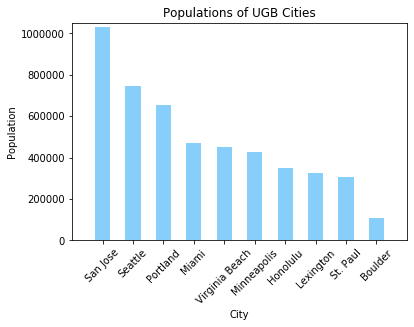

In [10]:
#barchart of UGB cities population
plt.bar(UGB_df["City"], UGB_df["2018_Estimate"], width = 0.5, color = 'lightskyblue')
plt.title("Populations of UGB Cities")
plt.xlabel("City")
plt.ylabel("Population")
plt.xlim(-1,10)
plt.ylim(0,1050000)
plt.xticks(rotation = 45)

([0, 1, 2], <a list of 3 Text xticklabel objects>)

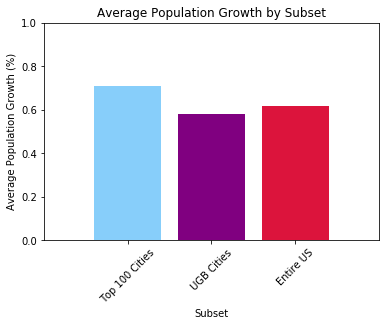

In [11]:
#bar chart of top100, UGB and total US
#compare to total US population growth = .62%, https://www.multpl.com/us-population-growth-rate/table/by-year
plt.bar("Top 100 Cities", top100_summ_df["Avg Pop Growth"], color = 'lightskyblue')
plt.bar("UGB Cities", UGB_summ_df["Avg Pop Growth"], color = 'purple' )
plt.bar("Entire US", [.62], color = 'crimson')
plt.title("Average Population Growth by Subset")
plt.xlabel("Subset")
plt.ylabel("Average Population Growth (%)")
plt.xlim(-1,3)
plt.ylim(0,1)
plt.xticks(rotation = 45)

In [12]:
UGB_growth = ((UGB_summ_df["Avg Pop Growth"]/100) * top100_summ_df["Avg Population"])
top100_growth = ((top100_summ_df["Avg Pop Growth"]/100) * top100_summ_df["Avg Population"])
US_growth = (.0062 * top100_summ_df["Avg Population"])

Pop_growth_df = {}
Pop_growth_df = pd.DataFrame()
Pop_growth_df["UGB Pop Increase"] = UGB_growth
Pop_growth_df["Top 100 City Pop Increase"] = top100_growth
Pop_growth_df["USA Pop Increase"] = US_growth
Pop_growth_df = pd.DataFrame(Pop_growth_df)
Pop_growth_df

,UGB Pop Increase,Top 100 City Pop Increase,USA Pop Increase
0,3746.5158,4599.17112,4004.8962


In [13]:
UGB_sample = (UGB_df["Percent Difference"])
top100_sample = (top100_df["Percent Difference"])
stats.ttest_ind(UGB_sample, top100_sample, equal_var=False)

Ttest_indResult(statistic=-0.43310724388978855, pvalue=0.6736077607856297)

In [14]:
#creat heatmap of UGB cities population growth and decline
target_cities = ["San Jose, California", "Seattle, Washington", "Portland, Oregon", "Miami, Florida", "Virginia Beach, Virginia",
                "Minneapolis, Minnesota", "Honolulu, Hawaii", "Lexington, Kentucky", "St. Paul, Minnesota", "Boulder, Colorado"]

for city in target_cities:
    params = {"address": city, "key": gkey}
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    response = requests.get(base_url, params = params)

    cities_geo = response.json()

    lat = cities_geo["results"][0]["geometry"]["location"]["lat"]
    lng = cities_geo["results"][0]["geometry"]["location"]["lng"]

    print(f"{city}: {lat}, {lng}")


San Jose, California: 37.3382082, -121.8863286
Seattle, Washington: 47.6062095, -122.3320708
Portland, Oregon: 45.5051064, -122.6750261
Miami, Florida: 25.7616798, -80.1917902
Virginia Beach, Virginia: 36.8529263, -75.97798499999999
Minneapolis, Minnesota: 44.977753, -93.2650108
Honolulu, Hawaii: 21.3069444, -157.8583333
Lexington, Kentucky: 38.0405837, -84.5037164
St. Paul, Minnesota: 44.9537029, -93.0899578
Boulder, Colorado: 40.0149856, -105.2705456


In [15]:
#create data frame of the outputs
cities_df = {}
cities_df = pd.DataFrame()

cities_df["City"] = ["San Jose, California", "Seattle, Washington", "Portland, Oregon", "Miami, Florida", "Virginia Beach, Virginia",
                "Minneapolis, Minnesota", "Honolulu, Hawaii", "Lexington, Kentucky", "St. Paul, Minnesota", "Boulder, Colorado"]
cities_df["Lat"] = [37.3382082, 47.6062095, 45.5051064,
                           25.7616798, 36.8529263, 44.977753,
                           21.3069444, 38.0405837, 44.9537029, 40.0149856]
cities_df["Lng"] = ["-121.8863286", "-122.3320708", "-122.6750261", "-80.1917902", "-75.97798499999999", "-93.2650108",
                    "-157.8583333", "-84.5037164", "-93.0899578", "-105.2705456"]

cities_df["Population Growth"] = UGB_df["Percent Difference"]
cities_df = pd.DataFrame(cities_df)
cities_df

,City,Lat,Lng,Population Growth
0,"San Jose, California",37.338208,-121.8863286,-0.2
1,"Seattle, Washington",47.606209,-122.3320708,2.1
2,"Portland, Oregon",45.505106,-122.6750261,0.7
3,"Miami, Florida",25.761680,-80.1917902,1.9
4,"Virginia Beach, Virginia",36.852926,-75.97798499999999,0.1
5,"Minneapolis, Minnesota",44.977753,-93.2650108,1.0
6,"Honolulu, Hawaii",21.306944,-157.8583333,-0.6
7,"Lexington, Kentucky",38.040584,-84.5037164,0.5
8,"St. Paul, Minnesota",44.953703,-93.0899578,0.8
9,"Boulder, Colorado",40.014986,-105.2705456,-0.5


In [16]:
#create heatmap 
locations = cities_df[["Lat", "Lng"]].astype(float)
growth = cities_df["Population Growth"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = (growth + .6), 
                                 dissipating = False, max_intensity = 2.7,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
#positive cities; Seattle, Portland, Miami, Virginia Beach, Lexington, Minneapolis, St. Paul 
#negative cities; San Jose, Honolulu, Boulder